In [1]:
!pip install mediapipe
!pip install mediapipe deepface

In [2]:
!pip install face-alignment

In [3]:
!pip install face-alignment deepface --quiet

In [4]:
!pip uninstall mediapipe -y
!pip install mediapipe==0.10.3

Found existing installation: mediapipe 0.10.21
Uninstalling mediapipe-0.10.21:
  Successfully uninstalled mediapipe-0.10.21
ERROR: Could not find a version that satisfies the requirement mediapipe==0.10.3 (from versions: 0.10.5, 0.10.7, 0.10.8, 0.10.9, 0.10.10, 0.10.11, 0.10.13, 0.10.14, 0.10.15, 0.10.18, 0.10.20, 0.10.21)
ERROR: No matching distribution found for mediapipe==0.10.3


In [5]:
!pip install mediapipe==0.10.21

  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl (35.6 MB)


# Mediapipe Face Mesh

Upload an image


Saving portrait-of-an-older-man-wearing-a-white-shirt-on-a-gray-background-a-healthy-old-man-looks-at-a-camera-isolated-over-a-gray-wall-an-older-man-smiles-at-the-camera-a-happy-old-man-photo.jpg to portrait-of-an-older-man-wearing-a-white-shirt-on-a-gray-background-a-healthy-old-man-looks-at-a-camera-isolated-over-a-gray-wall-an-older-man-smiles-at-the-camera-a-happy-old-man-photo.jpg


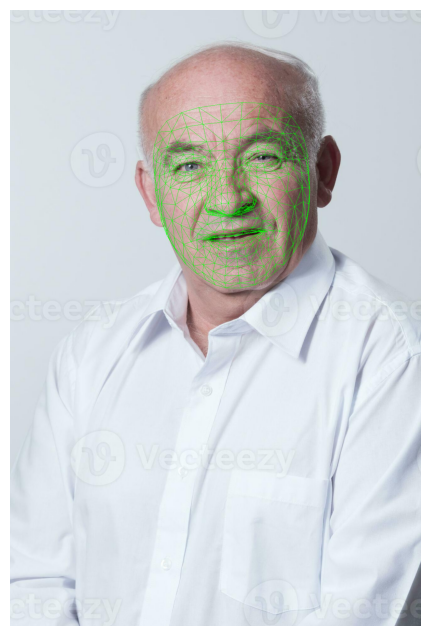

In [6]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
from PIL import Image
import io
import mediapipe as mp

mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils


def process_image(image_bytes):
    image = Image.open(io.BytesIO(image_bytes)).convert('RGB')
    img = np.array(image)
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1) as face_mesh:
        results = face_mesh.process(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
        if not results.multi_face_landmarks:
            print("No face detected")
            return

        annotated_image = img_bgr.copy()
        for face_landmarks in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(0,255,0), thickness=1, circle_radius=1)
            )
        plt.figure(figsize=(8,8))
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

print("Upload an image")
uploaded = files.upload()
for fn in uploaded:
    process_image(uploaded[fn])

Upload 2 images


Saving 478008053-8318969a-9b8d-4046-ade2-948891eac566.png to 478008053-8318969a-9b8d-4046-ade2-948891eac566 (4).png
Saving c0261819-800px-wm.jpg to c0261819-800px-wm.jpg


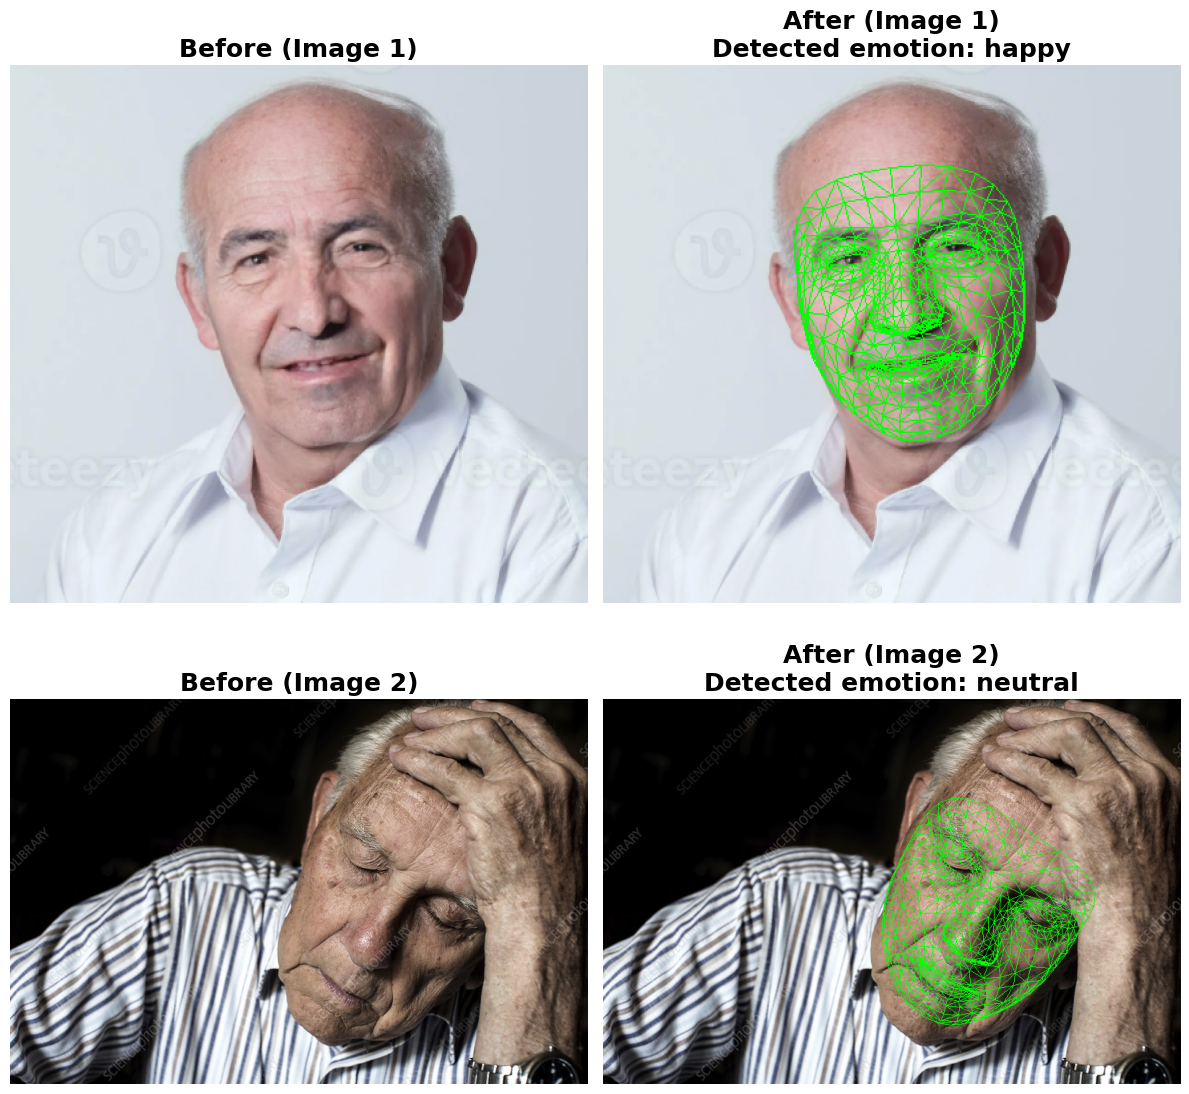

In [13]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
from PIL import Image
import io
from deepface import DeepFace

mp_face_mesh = mp.solutions.face_mesh

def process_images_multiple(images_bytes_list):
    fig, axes = plt.subplots(len(images_bytes_list), 2, figsize=(12, 6 * len(images_bytes_list)))

    if len(images_bytes_list) == 1:
        axes = np.expand_dims(axes, axis=0)  # تأكد من أن axes مصفوفة 2D إذا صورة واحدة فقط

    for idx, image_bytes in enumerate(images_bytes_list):
        # قراءة الصورة
        image = Image.open(io.BytesIO(image_bytes)).convert('RGB')
        img = np.array(image)
        img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        original_image = img_bgr.copy()

        # كشف المعالم
        with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1) as face_mesh:
            results = face_mesh.process(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
            annotated_image = img_bgr.copy()
            if results.multi_face_landmarks:
                for face_landmarks in results.multi_face_landmarks:
                    mp.solutions.drawing_utils.draw_landmarks(
                        image=annotated_image,
                        landmark_list=face_landmarks,
                        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
                        landmark_drawing_spec=None,
                        connection_drawing_spec=mp.solutions.drawing_utils.DrawingSpec(color=(0,255,0), thickness=1, circle_radius=1)
                    )

        # تحليل العاطفة
        temp_filename = f"temp_img_{idx}.jpg"
        image.save(temp_filename)
        emotion_result = DeepFace.analyze(img_path=temp_filename, actions=['emotion'], enforce_detection=False)
        dominant_emotion = emotion_result[0]['dominant_emotion']

        # عرض الصورة الأصلية
        axes[idx, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        axes[idx, 0].axis('off')
        axes[idx, 0].set_title(f"Before (Image {idx+1})", fontsize=18, fontweight='bold')

        # عرض الصورة بعد المعالجة
        axes[idx, 1].imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        axes[idx, 1].axis('off')
        axes[idx, 1].set_title(f"After (Image {idx+1})\nDetected emotion: {dominant_emotion}", fontsize=18, fontweight='bold')

    plt.tight_layout()
    plt.show()

# رفع صورتين
print("Upload 2 images")
uploaded = files.upload()
images_bytes_list = [uploaded[fn] for fn in uploaded]
process_images_multiple(images_bytes_list)


In [14]:
import cv2
from google.colab import files

# Upload the image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Read the image
img = cv2.imread(filename)

# Resize to 4K (3840x2160)
img_4k = cv2.resize(img, (3840, 2160), interpolation=cv2.INTER_CUBIC)

# Save the 4K image
output_filename = "image_4k.png"
cv2.imwrite(output_filename, img_4k)

print(f"4K image saved as {output_filename}")


Saving download.png to download.png
4K image saved as image_4k.png


# Face Alignment

In [8]:
import face_alignment
print(dir(face_alignment.LandmarksType))

['THREE_D', 'TWO_D', 'TWO_HALF_D', '__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__contains__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__iter__', '__le__', '__len__', '__lshift__', '__lt__', '__members__', '__mod__', '__module__', '__mul__', '__name__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__qualname__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'as_integer_ratio', 'bit_count', 'bit

Saving 478008053-8318969a-9b8d-4046-ade2-948891eac566.png to 478008053-8318969a-9b8d-4046-ade2-948891eac566 (1).png


Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100%|██████████| 85.7M/85.7M [00:04<00:00, 21.8MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip
100%|██████████| 91.9M/91.9M [00:04<00:00, 23.1MB/s]


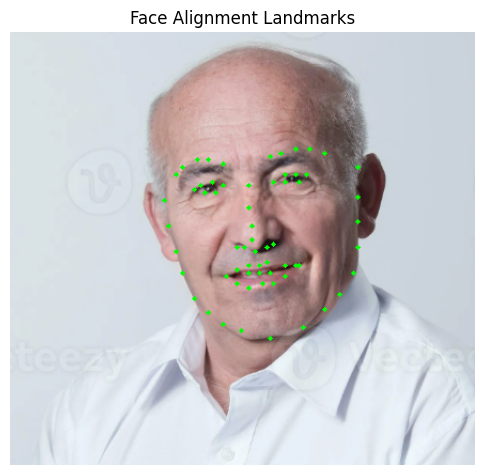

In [9]:
import face_alignment
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import io
from google.colab import files
import cv2

def face_alignment_landmarks(image_bytes):
    fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, device='cpu')
    img = Image.open(io.BytesIO(image_bytes)).convert('RGB')
    img_np = np.array(img)
    preds = fa.get_landmarks(img_np)

    if preds is None:
        print("No face detected by Face Alignment.")
        return

    img_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
    for landmark in preds:
        for (x, y) in landmark:
            cv2.circle(img_bgr, (int(x), int(y)), 2, (0,255,0), -1)

    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Face Alignment Landmarks")
    plt.show()

uploaded = files.upload()
for fn in uploaded:
    face_alignment_landmarks(uploaded[fn])

Upload an image to analyze face landmarks and emotion:


Saving 478008053-8318969a-9b8d-4046-ade2-948891eac566.png to 478008053-8318969a-9b8d-4046-ade2-948891eac566 (2).png


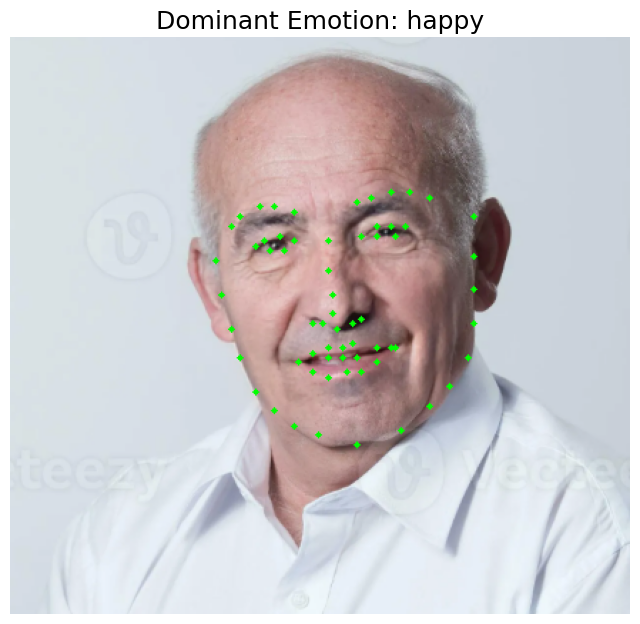

In [10]:
!pip install face-alignment deepface --quiet

import face_alignment
from deepface import DeepFace
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import io
from google.colab import files
import cv2

def analyze_face_and_emotion(image_bytes):
    fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, device='cpu')
    img = Image.open(io.BytesIO(image_bytes)).convert('RGB')
    img_np = np.array(img)
    preds = fa.get_landmarks(img_np)

    img_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
    if preds is not None:
        for landmark in preds:
            for (x, y) in landmark:
                cv2.circle(img_bgr, (int(x), int(y)), 2, (0,255,0), -1)
    else:
        print("No face detected by Face Alignment.")

    result = DeepFace.analyze(img_np, actions=['emotion'], enforce_detection=False)
    if isinstance(result, list):
        dominant_emotion = result[0]['dominant_emotion']
    else:
        dominant_emotion = result['dominant_emotion']

    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Dominant Emotion: {dominant_emotion}", fontsize=18)
    plt.show()

print("Upload an image to analyze face landmarks and emotion:")
uploaded = files.upload()
for fn in uploaded:
    analyze_face_and_emotion(uploaded[fn])
